## Domain ​- ​E-commerce

## Context 

Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.

## Data Description
Data columns- First three columns are ​userId, productId, and ratings​ and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.
## Source 

Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics
dataset.

## Objective 
To make a recommendation system that recommends at least five(5) new products based on the user's habits.

# <font style = "color:rgb(0,0,255)">Read and explore the given dataset</font>






### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
ratings = pd.read_csv("ratings_Electronics.csv", header=None, names=['userId','productId','ratings','timestamp'])
ratings.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


- There are 7824482 rows and 4 Columns in the dataset

In [4]:
#checking missing Values

ratings.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

- There are no missing values

In [47]:
ratings.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


### Distribution of Product Ratings

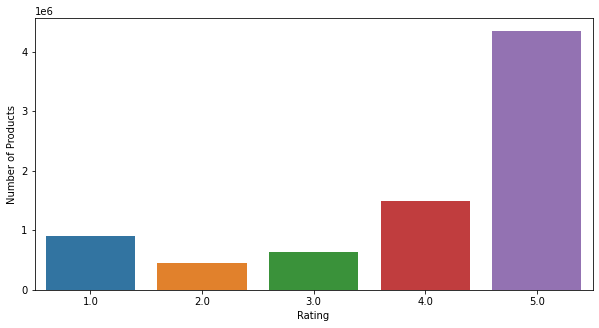

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(ratings.ratings)
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show();

- Ratings are on the scale 1 to 5
- Most of the users have given a rating of 5
- Less no of users have given rating of 2 

### Droping timestamp column

In [6]:
ratings.drop("timestamp",axis=1,inplace=True)

In [7]:
ratings.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# <font style = "color:rgb(0,0,255)">Take a subset of the dataset to make it less sparse/ denser.</font>



In [8]:
#number of unique userID
ratings.userId.nunique()

4201696

In [9]:
#number of unique items
ratings.productId.nunique()

476002

#### Checking the number of users who has given atleast 50 ratings 

In [10]:
user_count=ratings.userId.value_counts()
finaldf=ratings[ratings.userId.isin(user_count[user_count>=50].index)]

In [11]:
print('Number of users who has given atleast 50 ratings = ',len(finaldf))
print('Number of unique users who has given atleast 50 ratings = ',finaldf['userId'].nunique())

Number of users who has given atleast 50 ratings =  125871
Number of unique users who has given atleast 50 ratings =  1540


In [12]:
print('Number of unique ITEMS in final data = ', finaldf['productId'].nunique())

Number of unique ITEMS in final data =  48190


In [13]:
finaldf.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


#### Calculating the density of the matrix

In [14]:
final_ratings_matrix = finaldf.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [15]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <font style = "color:rgb(0,0,255)">Split the data randomly into a train and test dataset.</font>



In [17]:
users_popularity = finaldf.copy()

In [18]:
train_data, test_data = train_test_split(users_popularity, test_size = 0.3, random_state=10)
train_data.head()

,userId,productId,ratings
7760154,A2JKM8KF3296CW,B00HPM1G8Q,5.0
4898726,A2MSBIA18RXYQC,B005F5II1I,2.0
2725558,AGYH5U11ZKPFB,B002MZUNXU,5.0
3600596,A6FIAB28IS79,B003VAHYXW,4.0
3084188,A3IJ4Z18FTIIP,B00365EVXI,1.0


In [19]:
train_data.shape

(88109, 3)

In [20]:
test_data.shape

(37762, 3)

# <font style = "color:rgb(0,0,255)"> Popularity Recommender model</font>



In [21]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0594451647,1
1,0970407998,2
2,0972683275,3
3,1400501466,4
4,1400501520,1


In [22]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productId,score,Rank
30874,B0088CJT4U,142,1.0
19570,B003ES5ZUU,134,2.0
30273,B007WTAJTO,126,3.0
8700,B000N99BBC,117,4.0
30561,B00829TIEK,104,5.0


In [23]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [24]:
find_recom = [4,100,600]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId: 4

       userId   productId  score  Rank
30874       4  B0088CJT4U    142   1.0
19570       4  B003ES5ZUU    134   2.0
30273       4  B007WTAJTO    126   3.0
8700        4  B000N99BBC    117   4.0
30561       4  B00829TIEK    104   5.0


Here is the recommendation for the userId: 100

       userId   productId  score  Rank
30874     100  B0088CJT4U    142   1.0
19570     100  B003ES5ZUU    134   2.0
30273     100  B007WTAJTO    126   3.0
8700      100  B000N99BBC    117   4.0
30561     100  B00829TIEK    104   5.0


Here is the recommendation for the userId: 600

       userId   productId  score  Rank
30874     600  B0088CJT4U    142   1.0
19570     600  B003ES5ZUU    134   2.0
30273     600  B007WTAJTO    126   3.0
8700      600  B000N99BBC    117   4.0
30561     600  B00829TIEK    104   5.0




- Hence we got the recommednations through the Popularity based recommender.
- Here we can see that the recommendations are same for all users.
- Recommendations are not at all personalised, that is the main drawback for this model.

# <font style = "color:rgb(0,0,255)">Collaborative Filtering model.</font>



In [25]:
from surprise.model_selection import train_test_split
### Transform data to surprise format
reader = Reader(rating_scale=(1,5))
# Surprise dataset
data = Dataset.load_from_df(finaldf[['userId','productId','ratings']],reader)


In [26]:
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [27]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x7fd07e84c3c0>

In [28]:
print(trainset.to_raw_uid(6))

ANSVB7OYSXZSL


### SVD

In [29]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [30]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [31]:
testset[33]

('A12EVK82QUTSA6', 'B0035GT2SC', 5.0)

In [32]:
test_pred_svd = svd_model.test(testset)

### KNNWithMeans

### User Based Collaborative Filtering

In [33]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': True})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
test_pred_knn=algo_i.test(testset)

In [35]:
test_pred_knn

[Prediction(uid='A2ED50E3KWKUKW', iid='B0015VW3BM', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AEL6CQNQXONBX', iid='B00JK7Z83S', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3V0YR50F1XSKP', iid='B0051B4FP4', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A7Z2J9V37ABCO', iid='B004GUS4WG', r_ui=5.0, est=3.9184416720078312, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='APG2BHOAXPNEQ', iid='B00BHZLHBI', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3BVN2QBNPBHCR', iid='B00HRQB28Y', r_ui=5.0, est=4.7630031892469304, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A3OA4DV4L81N1D', iid='B0009P83EG', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'rea

### Item Based Collaborative Filtering

In [36]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [37]:
test_pred_knni=algo_i.test(testset)

In [38]:
test_pred_knni

[Prediction(uid='A2ED50E3KWKUKW', iid='B0015VW3BM', r_ui=5.0, est=4.900701754385965, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='AEL6CQNQXONBX', iid='B00JK7Z83S', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3V0YR50F1XSKP', iid='B0051B4FP4', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A7Z2J9V37ABCO', iid='B004GUS4WG', r_ui=5.0, est=4.58730516795033, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='APG2BHOAXPNEQ', iid='B00BHZLHBI', r_ui=5.0, est=4.263879325868881, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3BVN2QBNPBHCR', iid='B00HRQB28Y', r_ui=5.0, est=4.668185019240343, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A3OA4DV4L81N1D', iid='B0009P83EG', r_ui=5.0, est=4.263879325868881, details={'was_impossible



# <font style = "color:rgb(0,0,255)">Evaluate the above models.</font>



In [39]:
# get RMSE
print("SVD Model : Test Set")
accuracy.rmse(test_pred_svd, verbose=True)

print("User-based Model : Test Set")
accuracy.rmse(test_pred_knn, verbose=True)

print("Item-based Model : Test Set")
accuracy.rmse(test_pred_knni, verbose=True)

SVD Model : Test Set
RMSE: 1.5244
User-based Model : Test Set
RMSE: 1.0663
Item-based Model : Test Set
RMSE: 1.1281


1.1281469960524972

### - User Based KNNWithMeans is giving better results

# <font style = "color:rgb(0,0,255)">Getting Top 5 Recommendations</font>




Lets Get top 5 Product Recommendation for **User Id A3V0YR50F1XSKP**

In [40]:
pred = pd.DataFrame(test_pred_knn)
pred[pred['uid'] == 'A3V0YR50F1XSKP'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
2,B0051B4FP4,5.0,4.263879
14821,B004C8BUAK,5.0,4.263879
30024,B003U8I240,5.0,4.647727
26336,B002TLT10I,5.0,1.960859
25675,B001K56XW8,5.0,4.263879


Lets try again with for **User Id AWJWCKB92RJX2**

In [45]:
pred = pd.DataFrame(test_pred_knn)
pred[pred['uid'] == 'AWJWCKB92RJX2'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
505,B000G6U5GW,5.0,4.263879
877,B0073WRKAG,5.0,4.263879
11847,B00486UR2I,5.0,4.000000
23033,B0001YM40E,5.0,4.263879
24004,B0006A7X36,5.0,1.467153


# <font style = "color:rgb(0,0,255)">Summarise your insights</font>



- **Collaborative filtering model** was able to provide much **better accuracy** than **popularity based model** , as expected.
- **Model-based Collaborative Filtering** is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.
- **User Based** collaborative filtering has slightly **better accuracy** than **item based** collaborative filtering
- **Popularity based recommendation** system is **not personalised** and recommends common items for all users.
- The **Popularity based model** has recommended the **same** set of 5 products to both but **Collaborative Filtering** based model has recommended entire **different** list based on the user past purchase history


